<a href="https://colab.research.google.com/github/KOLLIVENNELACHOWDARY/Employee-salary-prediction/blob/main/Employee_salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

Data collection

In [3]:
from google.colab import files
uploaded = files.upload()

Saving adult 3.csv.xlsx to adult 3.csv.xlsx


Data pre-processing

In [4]:
data = pd.read_excel("adult 3.csv.xlsx")

In [5]:
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [6]:
data.tail(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [7]:
data.shape

(48842, 15)

In [8]:
data.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [9]:
print(data.workclass.value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [10]:
data.workclass.replace({'?':'Others'},inplace=True)
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


/tmp/ipython-input-10-4184710730.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.workclass.replace({'?':'Others'},inplace=True)


In [11]:
print(data['occupation'].value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [12]:
data.occupation.replace({'?':'Others'},inplace=True)
print(data['occupation'].value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


/tmp/ipython-input-12-1148816719.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.occupation.replace({'?':'Others'},inplace=True)


In [13]:
print(data['education'].value_counts())

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


In [14]:
data=data[data['workclass']!='Without-pay']
data=data[data['workclass']!='Never-worked']
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


In [15]:
print(data.relationship.value_counts())

relationship
Husband           19708
Not-in-family     12582
Own-child          7566
Unmarried          5123
Wife               2327
Other-relative     1505
Name: count, dtype: int64


In [16]:
print(data.gender.value_counts())

gender
Male      32629
Female    16182
Name: count, dtype: int64


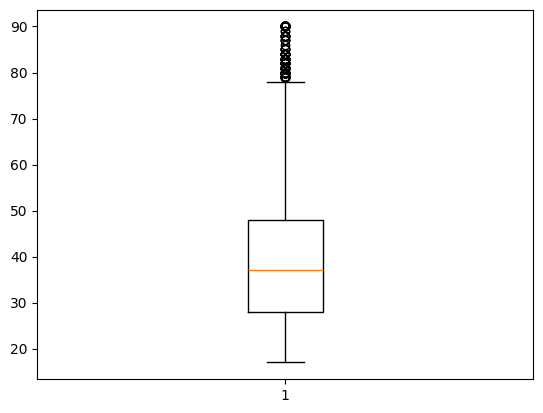

In [17]:
#outlier detection
import matplotlib.pyplot as plt   #visualization
plt.boxplot(data['age'])
plt.show()

In [18]:
data=data[(data['age']<=75)&(data['age']>=17)]

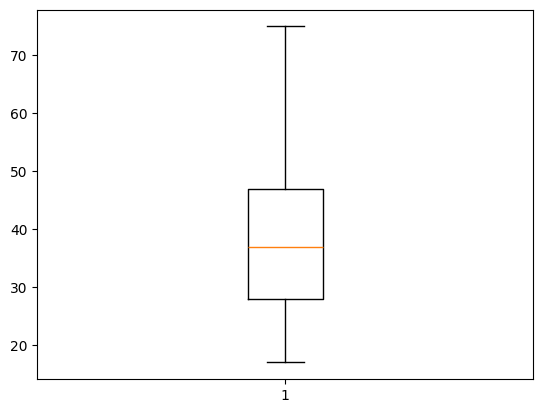

In [19]:
plt.boxplot(data['age'])
plt.show()

In [20]:
data.shape

(48438, 15)

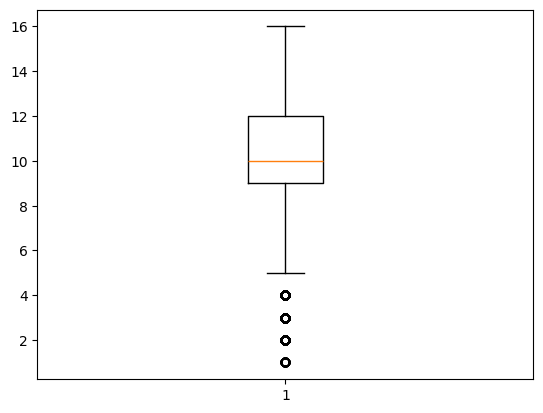

In [21]:
plt.boxplot(data['educational-num'])
plt.show()

In [22]:
data=data[(data['educational-num']<=16)&(data['educational-num']>=5)]

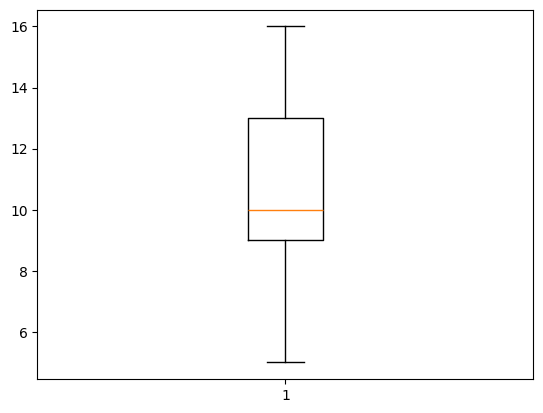

In [23]:
plt.boxplot(data['educational-num'])
plt.show()

In [24]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Others,103497,Some-college,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [25]:
from sklearn.preprocessing import LabelEncoder   #import libarary
encoder=LabelEncoder()                       #create object
data['workclass']=encoder.fit_transform(data['workclass']) #7 categories   0,1, 2, 3, 4, 5, 6,
data['marital-status']=encoder.fit_transform(data['marital-status'])   #3 categories 0, 1, 2
data['occupation']=encoder.fit_transform(data['occupation'])
data['relationship']=encoder.fit_transform(data['relationship'])      #5 categories  0, 1, 2, 3, 4
data['race']=encoder.fit_transform(data['race'])
data['gender']=encoder.fit_transform(data['gender'])    #2 catogories     0, 1
data['native-country']=encoder.fit_transform(data['native-country'])
data['education']=encoder.fit_transform(data['education'])

split the data

In [26]:
x=data.drop(columns=['income','fnlwgt','educational-num','capital-gain','capital-loss'])
y=data['income']
x

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country
0,25,3,1,4,6,3,2,1,40,39
1,38,3,8,2,4,0,4,1,50,39
2,28,1,4,2,11,0,4,1,40,39
3,44,3,11,2,6,0,2,1,40,39
4,18,2,11,4,8,3,4,0,30,39
...,...,...,...,...,...,...,...,...,...,...
48837,27,3,4,2,13,5,4,0,38,39
48838,40,3,8,2,6,0,4,1,40,39
48839,58,3,8,6,0,4,4,0,40,39
48840,22,3,8,4,0,3,4,1,20,39


Choosing the best model

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


LogisticRegression Accuracy: 0.7559
              precision    recall  f1-score   support

       <=50K       0.78      0.94      0.85      7010
        >50K       0.53      0.21      0.30      2334

    accuracy                           0.76      9344
   macro avg       0.65      0.57      0.58      9344
weighted avg       0.72      0.76      0.71      9344

RandomForest Accuracy: 0.8093
              precision    recall  f1-score   support

       <=50K       0.86      0.90      0.88      7010
        >50K       0.64      0.55      0.59      2334

    accuracy                           0.81      9344
   macro avg       0.75      0.72      0.73      9344
weighted avg       0.80      0.81      0.80      9344

KNN Accuracy: 0.8079
              precision    recall  f1-score   support

       <=50K       0.86      0.88      0.87      7010
        >50K       0.62      0.58      0.60      2334

    accuracy                           0.81      9344
   macro avg       0.74      0.73      0.

In [28]:
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,39,<=50K
1,38,3,89814,8,9,2,4,0,4,1,0,0,50,39,<=50K
2,28,1,336951,4,12,2,11,0,4,1,0,0,40,39,>50K
3,44,3,160323,11,10,2,6,0,2,1,7688,0,40,39,>50K
4,18,2,103497,11,10,4,8,3,4,0,0,0,30,39,<=50K
5,34,3,198693,0,6,4,7,1,4,1,0,0,30,39,<=50K
6,29,2,227026,8,9,4,8,4,2,1,0,0,40,39,<=50K
7,63,5,104626,10,15,2,10,0,4,1,3103,0,32,39,>50K
8,24,3,369667,11,10,4,7,4,4,0,0,0,40,39,<=50K
10,65,3,184454,8,9,2,6,0,4,1,6418,0,40,39,>50K


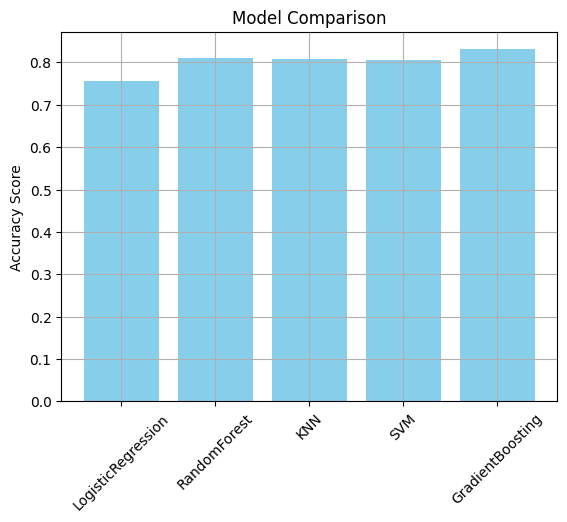

In [29]:
import matplotlib.pyplot as plt
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Training the model

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name}: {acc:.4f}")

# Get best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n✅ Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

# Save the best model
joblib.dump(best_model, "best_model.pkl")
print("✅ Saved best model as best_model.pkl")


LogisticRegression: 0.7558
RandomForest: 0.8107
KNN: 0.7827
SVM: 0.7509
GradientBoosting: 0.8305

✅ Best model: GradientBoosting with accuracy 0.8305
✅ Saved best model as best_model.pkl


In [31]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

Streamlite application

In [32]:
# Install streamlit and download cloudflared (skip uninstall errors)
!pip install streamlit --quiet --no-deps
!wget -q https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64 -O cloudflared
!chmod +x cloudflared


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 68.2 MB/s eta 0:00:00


In [33]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the trained model
model = joblib.load("best_model.pkl")

st.set_page_config(page_title="Employee Salary Classification", page_icon="💼", layout="centered")

st.title("💼 Employee Salary Classification App")
st.markdown("Predict whether an employee earns >50K or ≤50K based on input features.")

# Sidebar inputs (these must match your training feature columns)
st.sidebar.header("Input Employee Details")

# Define possible values for categorical features based on your training data
workclass_options = ['Private', 'Self-emp-not-inc', 'Local-gov', 'State-gov', 'Self-emp-inc', 'Federal-gov', 'Others']
education_options = ['HS-grad', 'Assoc-acdm', 'Some-college', 'Prof-school', 'Doctorate', 'Bachelors', 'Masters', 'Assoc-voc','Preschool','1st-5th','6th-9th','10th','11th-12th']
marital_status_options = ['Never-married', 'Married-civ-spouse', 'Local-gov', 'Divorced', 'Married-spouse-absent', 'Separated', 'Widowed', 'Married-AF-spouse']
occupation_options = ['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', 'Machine-op-inspct', 'Others', 'Other-service', 'Unmarried', 'Prof-specialty', 'Craft-repair', 'Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', 'Sales', 'Tech-support', 'Transport-moving', 'Priv-house-serv', 'Armed-Forces']
relationship_options = ['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife', 'Other-relative']
race_options = ['Black', 'White', 'Other']
gender_options = ['Male', 'Female']
native_country_options = ['United-States', '?', 'Mexico', 'Philippines', 'Germany', 'Puerto-Rico', 'Canada', 'El-Salvador', 'India', 'South', 'Cuba', 'England', 'Jamaica', 'Dominican-Republic', 'Italy', 'Japan', 'Guatemala', 'Columbia', 'Poland', 'Haiti', 'Portugal', 'Taiwan', 'Iran', 'China', 'Nicaragua', 'Peru', 'Greece', 'France', 'Ecuador', 'Ireland', 'Hong', 'Trinadad&Tobago', 'Cambodia', 'Thailand', 'Laos', 'Yugoslavia', 'Outlying-US(Guam-USVI-etc)', 'Honduras', 'Hungary', 'Scotland', 'Holand-Netherlands']


age = st.sidebar.slider("Age", 17, 75, 30)
workclass = st.sidebar.selectbox("Workclass", workclass_options)
education = st.sidebar.selectbox("Education", education_options)
marital_status = st.sidebar.selectbox("Marital Status", marital_status_options)
occupation = st.sidebar.selectbox("Occupation", occupation_options)
relationship = st.sidebar.selectbox("Relationship", relationship_options)
race = st.sidebar.selectbox("Race", race_options)
gender = st.sidebar.selectbox("Gender", gender_options)
hours_per_week = st.sidebar.slider("Hours per week", 1, 99, 40)
native_country = st.sidebar.selectbox("Native Country", native_country_options)


# Build input DataFrame (⚠️ must match preprocessing of your training data)
input_df = pd.DataFrame({
    'age': [age],
    'workclass': [workclass],
    'education': [education],
    'marital-status': [marital_status],
    'occupation': [occupation],
    'relationship': [relationship],
    'race': [race],
    'gender': [gender],
    'hours-per-week': [hours_per_week],
    'native-country': [native_country]
})

# Preprocessing for single input
def preprocess_input(df):
    df = df.copy()
    # Drop columns that were not used for training
    cols_to_drop = ['fnlwgt', 'capital-gain', 'capital-loss', 'educational-num']
    df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

    # Apply the same label encoding as in the notebook
    categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
    for col in categorical_cols:
        # Create a LabelEncoder for each column and fit it with all possible values
        encoder = LabelEncoder()
        if col == 'workclass':
            encoder.fit(workclass_options)
        elif col == 'education':
            encoder.fit(education_options)
        elif col == 'marital-status':
            encoder.fit(marital_status_options)
        elif col == 'occupation':
            encoder.fit(occupation_options)
        elif col == 'relationship':
            encoder.fit(relationship_options)
        elif col == 'race':
            encoder.fit(race_options)
        elif col == 'gender':
            encoder.fit(gender_options)
        elif col == 'native-country':
            encoder.fit(native_country_options)
        # Check if column exists before transforming
        if col in df.columns:
            df[col] = encoder.transform(df[col])

    # Apply StandardScaler to numerical features that were used for training
    numerical_cols = ['age', 'hours-per-week'] # Only remaining numerical features used for training
    # Check if numerical_cols are in df.columns before scaling
    numerical_cols = [col for col in numerical_cols if col in df.columns]
    if numerical_cols:
        scaler = StandardScaler()
        df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    return df

st.write("### 🔎 Input Data")
st.write(input_df)

# Predict button
if st.button("Predict Salary Class"):
    processed_input_df = preprocess_input(input_df)
    prediction = model.predict(processed_input_df)
    st.success(f"✅ Prediction: {prediction[0]}")

# Batch prediction
st.markdown("---")
st.markdown("#### 📂 Batch Prediction")
uploaded_file = st.file_uploader("Upload a CSV file for batch prediction", type="csv")

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    st.write("Uploaded data preview:", batch_data.head())

    # Apply preprocessing to batch data
    processed_batch_data = preprocess_input(batch_data)

    batch_preds = model.predict(processed_batch_data)
    batch_data['PredictedClass'] = batch_preds
    st.write("✅ Predictions:")
    st.write(batch_data.head())
    csv = batch_data.to_csv(index=False).encode('utf-8')
    st.download_button("Download Predictions CSV", csv, file_name='predicted_classes.csv', mime='text/csv')

Writing app.py


In [34]:
import threading
import time
import subprocess

# Run Streamlit in background
def run_streamlit():
    subprocess.Popen(["streamlit", "run", "app.py"])

threading.Thread(target=run_streamlit).start()
time.sleep(5)  # Give it time to start

# Start tunnel with cloudflared
!./cloudflared tunnel --url http://localhost:8501 --no-autoupdate

2025-07-20T18:13:06Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you should use a pre-created named tunnel by following: https://developers.cloudflare.com/cloudflare-one/connections/connect-apps
2025-07-20T18:13:06Z INF Requesting new quick Tunnel on trycloudflare.com...
2025-07-20T18:13:12Z INF +--------------------------------------------------------------------------------------------+
2025-07-20T18:13:12Z INF |  Your quick Tunnel has been created! Visit it at (it may take some time to be reachable):  |
2025-07-20T18:13:12Z INF |  https://disaster-vacation-blocking-indicating.tryclou